In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 6.6 MB/s 
     |████████████████████████████████| 596 kB 72.1 MB/s 
     |████████████████████████████████| 895 kB 38.8 MB/s 
     |████████████████████████████████| 59 kB 9.8 MB/s 
     |████████████████████████████████| 3.3 MB 30.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 28.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=bbdaf65fea5db2204e880b513a06789bb20c46c7c6dd85e7d0f601f5d6d2b53c
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [ ]:

from sentence_transformers import SentenceTransformer

In [ ]:
import torch

In [ ]:
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import transformers

In [ ]:
df = pd.read_csv('2018_iclr.csv')
df['confidence'] = df['confidence'].astype(str).str[0]
df['review'] = df['review']
review = df[['confidence','review']]
review = review.dropna(axis=0)

In [ ]:
review['confidence'] = review['confidence'].astype(int) -1 

In [ ]:
reviews = list(review['review'])

In [ ]:
def preprocess_text(sen):
    # Removing html tags
#     sentence = remove_tags(sen)
#     print(type(sen))
#     # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    sentence = re.sub(r'\n+', ' ', sentence)
    return sentence

In [ ]:
import regex as re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
sentences = []
for sen in tqdm(reviews):
    sentences.append(preprocess_text(sen.lower()))

100%|██████████| 2967/2967 [00:01<00:00, 2540.16it/s]


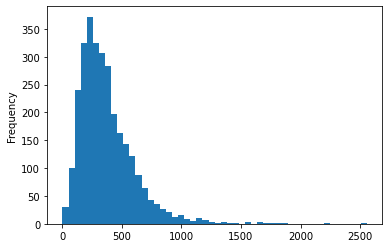

In [ ]:
review['review'].str.split().map(lambda x : len(x)).plot.hist(bins=50)

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
from sentence_transformers import SentenceTransformer , models



word_embedding_model = models.Transformer( 'bert-large-uncased', max_seq_length = 512 ) #'allenai/scibert_scivocab_uncased' bert-large-uncased

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension() , pooling_mode_max_tokens= False , pooling_mode_mean_tokens=False , pooling_mode_mean_sqrt_len_tokens=True)
pooling_model2 = models.Pooling(word_embedding_model.get_word_embedding_dimension() , pooling_mode_max_tokens= False , pooling_mode_mean_tokens=False , pooling_mode_mean_sqrt_len_tokens=True) 

In [ ]:
from torch import nn
dense_models = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=768 , activation_function=nn.Tanh())

In [ ]:
model = SentenceTransformer(modules = [ word_embedding_model , pooling_model])

In [ ]:
embeddings = model.encode(sentences , batch_size=128 , convert_to_numpy = True , show_progress_bar = True)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
X = embeddings
y = np.array(review['confidence'].astype(int))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.2 , stratify=np.array(review['confidence'].astype(str)))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss' ,  patience=3)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
model = Sequential()
model.add(Embedding( output_dim = 768, input_dim=768))
model.add(Conv1D(filters=64, kernel_size=8, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=4,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=8,kernel_size=1,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(256))
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError() , tf.keras.metrics.MeanAbsoluteError() ])
print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint,es]
model.fit(X,y, epochs=20, batch_size=16,verbose = 1,validation_data=(X_cv,y_cv), callbacks=callbacks_list)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 768)         589824    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, None, 64)          393280    
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, None, 32)          8224      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, None, 16)          1040      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, None, 16)         

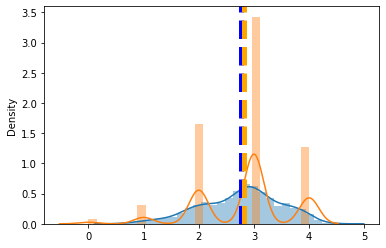

In [ ]:
results = model.predict(X_train)
req = y_train




ax1 = sns.distplot(results)
ax2 = sns.distplot(req)
plt.axvline(np.mean(results), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(req), color='orange', linestyle='dashed', linewidth=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
from matplotlib import pyplot
def metrics(expected , predicted):
  # Mean absolute error
  print("The rmse is " + str(np.sqrt(mean_squared_error(expected, predicted))))
  print("The mae is " + str(mean_absolute_error(expected, predicted)))
  print("The r2 is " + str(r2_score(expected, predicted)))
  print("Standard Deviation of predicted" + str(np.std(expected)))

metrics(results , req)

The rmse is 0.36557698485131074
The mae is 0.2871114255203459
The r2 is 0.7414237232629208
Standard Deviation of predicted0.71892655


In [ ]:
results = model.predict(X_cv)
req = y_cv

metrics(results , req)




The rmse is 0.3794091713074247
The mae is 0.2977776858541701
The r2 is 0.7046701757715175
Standard Deviation of predicted0.69815874


In [ ]:
ax1 = sns.distplot(results)
ax2 = sns.distplot(req)
plt.axvline(np.mean(results), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(req), color='orange', linestyle='dashed', linewidth=5)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
from matplotlib import pyplot
# def metrics(expected , predicted):
#   # Mean absolute error
#   print("The rmse is " + str(np.sqrt(mean_squared_error(expected, predicted))))
#   print("The mae is " + str(mean_absolute_error(expected, predicted)))
#   print("The r2 is " + str(r2_score(expected, predicted)))
#   print("Standard Deviation of predicted" + str(np.std(predicted)))

